In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.classes.function import number_of_nodes
from networkx.algorithms.centrality import degree_centrality,betweenness_centrality,load_centrality,eigenvector_centrality
from networkx.algorithms.cluster import average_clustering
import itertools

In [172]:
import networkx as nx

In [173]:
from networkx.convert_matrix import from_pandas_edgelist

In [174]:
import warnings 
warnings.filterwarnings("ignore")

# easy practice

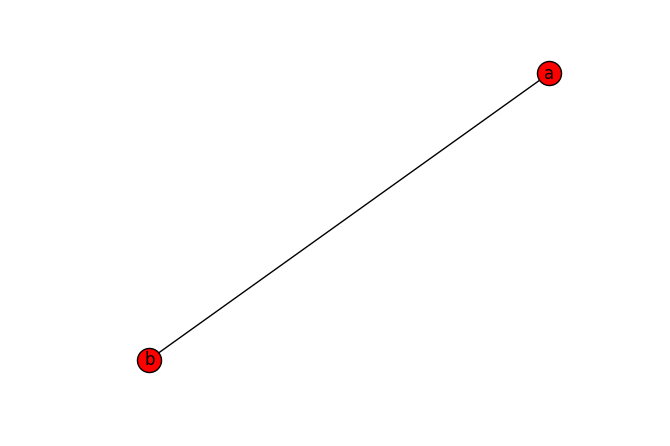

In [175]:
#graphの初期化
G = nx.Graph()
#edge の追加
G.add_edge("a","b")
nx.draw(G,with_labels=True)

In [176]:
G.add_edges_from([("c","d"),("a","d"),("a","c")])

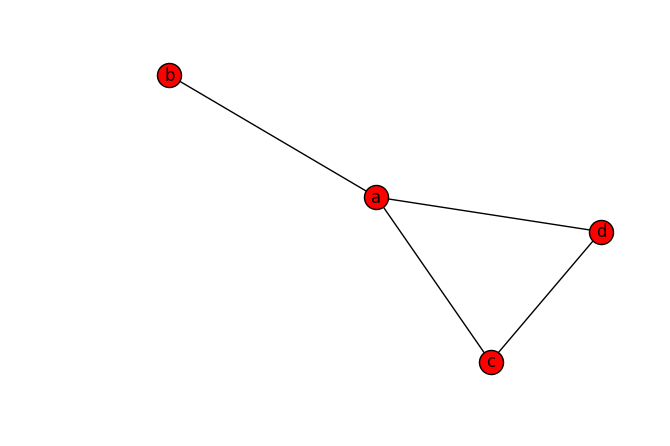

In [177]:
nx.draw(G,with_labels="True")

In [178]:
pos = nx.spring_layout(G)

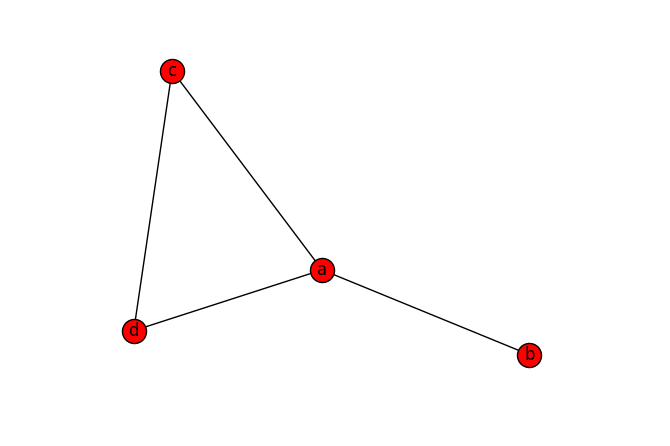

In [179]:
nx.draw(G,pos=pos, with_labels = True)

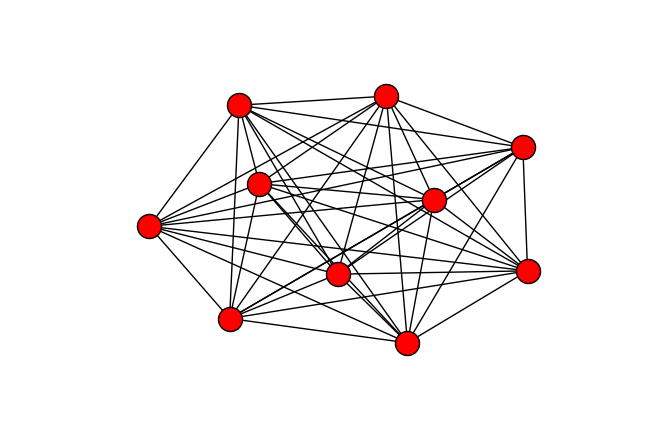

In [180]:
G = nx.complete_graph(10)
nx.draw(G)

# midium network by using "karate club"

In [181]:
network_df = pd.read_csv("karate.csv",index_col = 0)
network_df.head()

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [182]:
G = from_pandas_edgelist(network_df, source="from",target="to")
pos = nx.spring_layout(G)

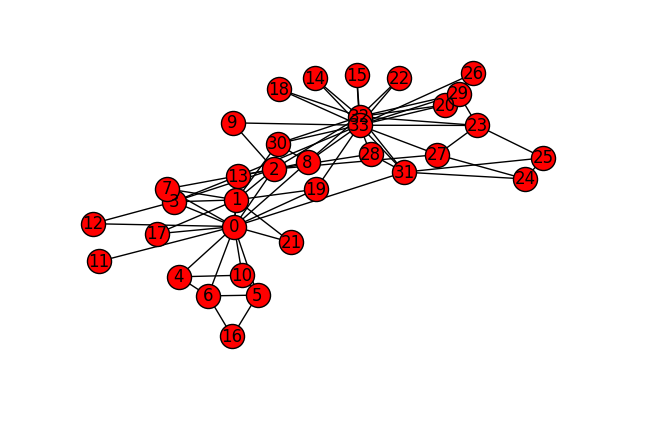

In [183]:
nx.draw(G,pos=pos,with_labels="True")

# small world network

In [184]:
# average distance 
print("平均距離",nx.average_shortest_path_length(G))

平均距離 2.408199643493761


In [185]:
# shortest pathからナイーブ実装
n = network_df.shape[0]
distance_list = np.array([])

for i in itertools.combinations(range(number_of_nodes(G)),2):
    from_node = i[0]
    to_node = i[1]
    distance = nx.shortest_path_length(G,source=from_node, target = to_node)
    distance_list = np.append(distance_list,distance)

print("平均最短距離:",sum(distance_list)/len(distance_list))

平均最短距離: 2.40819964349


The shortest path length is much larger than the number of nodes.
It is called the small world network.

# Scale free network

In [186]:
print("the degree of each nodes",G.degree())

the degree of each nodes [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [187]:
degree_list= [i[1] for i in G.degree()]

In [188]:
degree_list

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

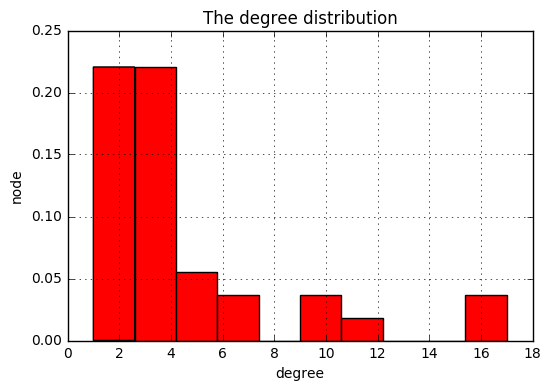

In [189]:
plt.hist(degree_list,color="red",normed=1)
plt.xlabel("degree")
plt.ylabel("node")
plt.title("The degree distribution")
plt.grid()

The relation between the number of nodes and each node`s degree is above.
The more degree is, the less the number of nodes is. This is called the scale free network.

# the cluster network

In [190]:
print("クラスター係数:",average_clustering(G))

クラスター係数: 0.5706384782076823


The cluster coefficient is medium. This seems because there are a lot of nodes that does not have cluster. However, as you can see, you can find some clusters, so I should use another indicator to confirm the cluster network.

# centrality

There are a lot of indicators to imply the centrality.

1. Degree centrality(次数中心性) 

In [214]:
print(degree_centrality(G))
print("be normalized by dividing by the maximum possible degree")

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
be normalized by dividing by the maximum possible degree


2. betweenness centrality(媒介中心性）

その点を通る経路が多いほど大きくなる。

In [215]:
print("媒介中心性",betweenness_centrality(G))

媒介中心性 {0: 0.4376352813852815, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976907, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.304074975949976}


node 1 has the highest betweenness-centrality in G. This means node 1 is the hub.

3. eigenvector centrality(固有ベクトル中心性)

In [217]:
eigenvector_centrality(G)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

4. page rank

In [219]:
nx.pagerank(G)

{0: 0.09700181758983709,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 3: 0.03586064322306479,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.02911334166344221,
 7: 0.024490758039509182,
 8: 0.029765339186167028,
 9: 0.014308950284462801,
 10: 0.021979406974834498,
 11: 0.009564916863537148,
 12: 0.014645186487916191,
 13: 0.029536314977202986,
 14: 0.014535161524273825,
 15: 0.014535161524273825,
 16: 0.016785378110253487,
 17: 0.014558859774243493,
 18: 0.014535161524273825,
 19: 0.019604416711937293,
 20: 0.014535161524273825,
 21: 0.014558859774243493,
 22: 0.014535161524273825,
 23: 0.03152091531163228,
 24: 0.021075455001162945,
 25: 0.021005628174745786,
 26: 0.015043395360629753,
 27: 0.025638803528350497,
 28: 0.01957296050943854,
 29: 0.02628726283711208,
 30: 0.02458933653429248,
 31: 0.03715663592267942,
 32: 0.07169213006588289,
 33: 0.1009179167487121}